# ESAME GRUPPO 3

### Andrea Alessandrelli



## **Deffuant Model**

È un modello ad opinioni continue $x\in[0;1]$.

Esso  dipende da un solo parametro $\epsilon\in[0;1]$ 
il quale regola la distanza minima tra due opinioni di due nodi 
vicini del grafo al fine che essi interagiscano e si possano influenzare a vicenda.


**Procedura**

1. Si seleziona random un nodo $i$ e un suo vicino $j$
2. Si calcola la loro distanza di opinione $d_{ij}=|x_i(t)-x_j(t)|$
    * Se $d_{ij}>\epsilon\Longrightarrow x_i(t+1)=x_i(t)$
    * Se $d_{ij}<\epsilon\Longrightarrow x_i(t+1)=\frac{x_i(t)+x_j(t)}{2}$

![Pasted Graphic 12.png](<attachment:Pasted Graphic 12.png>)
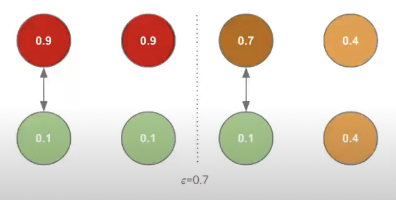

questo induce a 3 comportamenti differenti

![Pasted Graphic 13.png](<attachment:Pasted Graphic 13.png>)
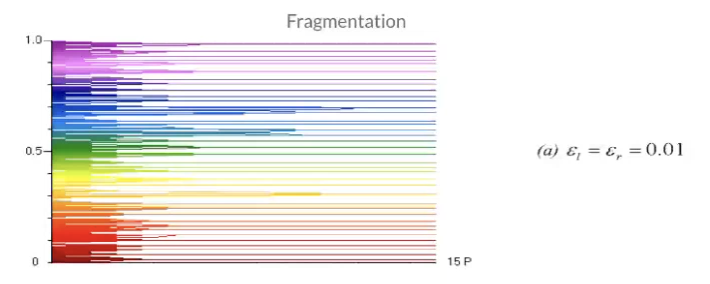

![Pasted Graphic 14.png](<attachment:Pasted Graphic 14.png>)
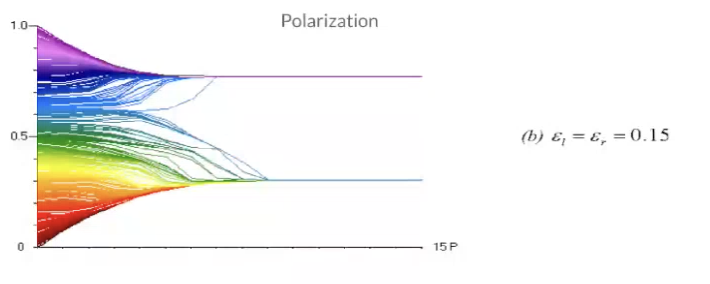

![Pasted Graphic 15.png](<attachment:Pasted Graphic 15.png>)
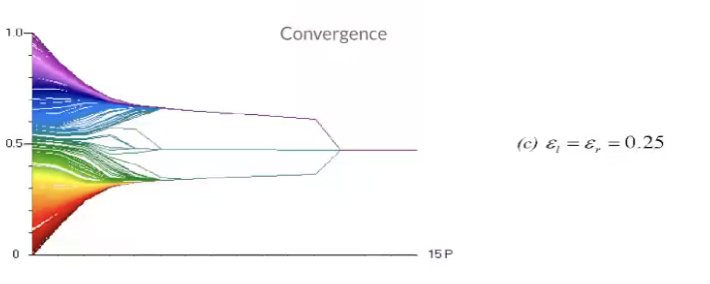

## **Algorithmic Bias**

È una semplice modifica del Deffuant model che tiene conto che tra tutte le varie opinioni di solito noi tendiamo ad ascoltare quelle che sono più simili alla nostra. Per far ciò introduciamo nella dinamica del sistema un algoritmo di *raccomandazione* che rende la probabilità di selezionare un nodo vicino biasata rispetto ai nodi vicini che hanno rispetto al nodo in esame un'opinione più simile

![Pasted Graphic 22.png](<attachment:Pasted Graphic 22.png>)
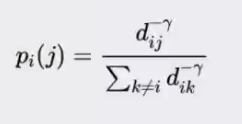

Dove $\gamma$ regola la forza del bias introdotto che fa si che la probabilità di interazione tra NODI con opinioni "simili" sia maggiore rispetto ai quella relativa a NODI con opinioni "distanti"

* $\gamma=0$ ritroviamo il caso di assenza di *raccomandazioni* $\longrightarrow$ ritorniamo al modello **Deffuant Model**

![Without bias.png](<attachment:Without bias.png>)
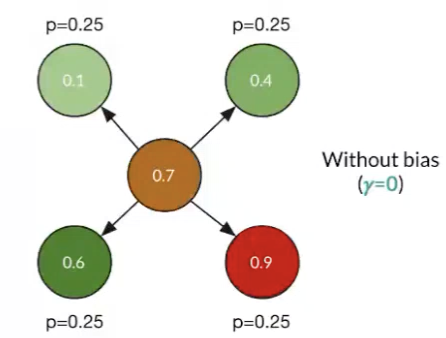

* $\gamma>0$ presenza di comunità sempre più chiuse $\longrightarrow$ è come se fosse presente un *algoritmo di raccomandazione*

![With bias.png](<attachment:With bias.png>)
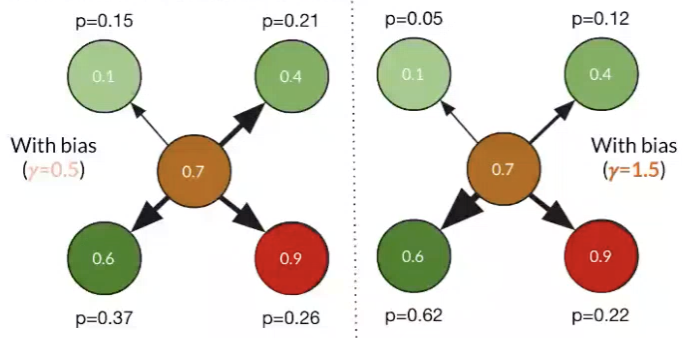

Questo è come se avessimo un reccomender sistema nel grafo (ovvero simuliamo le FILTER BUBBLES)


***

## **Media in Algorithmic Bias**

In questo modello ora si introducono dei nodi con opinioni statiche che quindi non cambiano mai (i MEDIA). Essi potenzialmente in base al loro valore e al grado di OPENMINDED degli altri nodi possono influire enormemente nell'evoluzione della diffusione delle opinioni nella rete

**Media MODERATO**

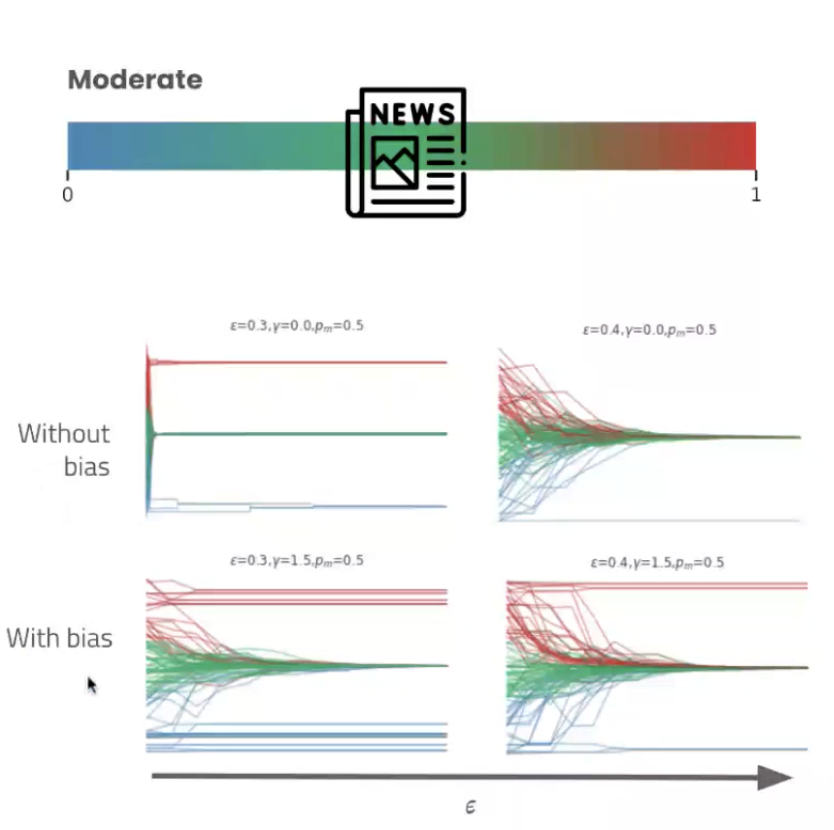

**Media ESTREMISTA**

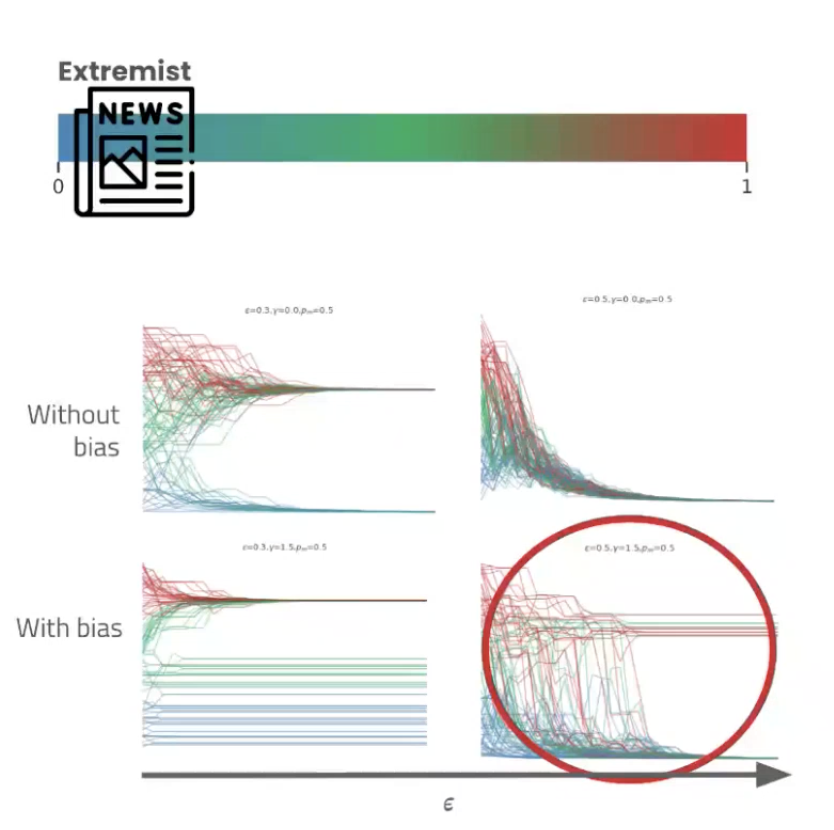

**2 MEDIA ESTREMISTI con opinioni opposte**

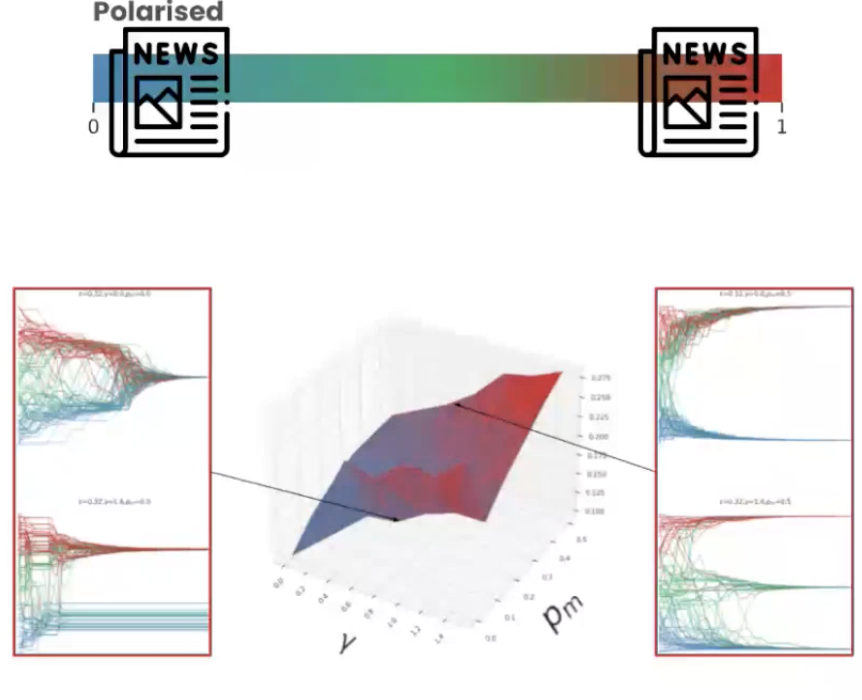

**3 Media: 2 ESTREMISTI e opposti e 1 MODERATO**

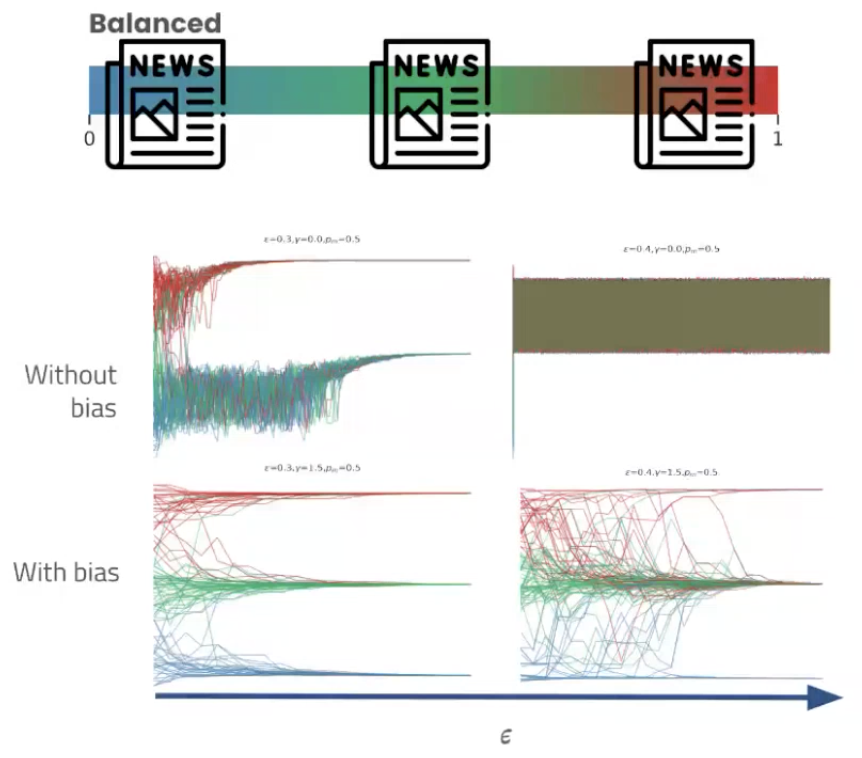

***
***
***

# 5. **Opinion Dynamics 2**:

### Simulare il modello di opinion dynamics (a classi continue) Algoritmic Bias su un sample (connesso) di 1000 nodi del grafo selezionato (utilizzando NDlib) e studiarne i trend al variare del valore dei parametri epsilon e gamma. Discutere i risultati ottenuti e fornire, ove possibile, la descrizione di un potenziale fenomeno - relativo ai dati selezionati - che possa essere catturato da diverse configurazioni del modello.

In [1]:
# The networkx library
import networkx as nx

# Numpy for enhanced math array management
import numpy as np
import seaborn as sn

# statistical tools (we only use ECDF)
from statsmodels.distributions.empirical_distribution import ECDF

# Mathematical plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


# to generate random numbers
from random import *

# to fit power law distributions
from powerlaw import *



---



---



---



## Descrizione dataset di partenza
**Selezionare una rete di interesse dal sito networkrepository, definendone il contesto latipologia dei nodi (individui, organizzazioni, ecc.) e delle connessioni (relazioni, interazioni, ecc.). La rete scelta deve essere composta da almeno 15-20.000 nodi.**




---



Arxiv ASTRO-PH (Astro Physics) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to Astro Physics category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv, and thus represents essentially the complete history of its ASTRO-PH section.

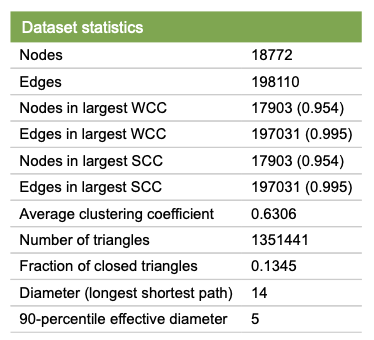

In [2]:
path='/Users/andreaalessandrelli/Desktop/MASTER_Big_data/SNA/Esame/ca-AstroPh/ca-AstroPh.mtx'

In [3]:
path2 = '/Users/andreaalessandrelli/Desktop/MASTER_Big_data/SNA/Esame/CA-AstroPh.txt'

In [4]:
# The networkx library
import networkx as nx

# Numpy for enhanced math array management
import numpy as np
import seaborn as sn

# statistical tools (we only use ECDF)
from statsmodels.distributions.empirical_distribution import ECDF

# Mathematical plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


# to generate random numbers
from random import *

# to fit power law distributions
from powerlaw import *


path2 = '/Users/andreaalessandrelli/Desktop/MASTER_Big_data/SNA/Esame/CA-AstroPh.txt' #CAMBIA CON LA TUA DIRECTORY



# Create an empty graph
G = nx.Graph()

# Path to the .edges file
file_path = path2

# Read the edges from the file and add them to the graph
with open(file_path, 'r') as file:
    for idx, line in enumerate(file):
        if line.startswith('%') or line.strip() == '':
            continue
        parts = line.strip().split()
        if len(parts) > 2:
            continue
        if idx < 20:
            print(parts)
        source = int(parts[0])-1
        target = int(parts[1])-1
        weight = float(parts[2]) if len(parts) > 2 else 1.0
        timestamp = int(parts[3]) if len(parts) > 3 else None

        # Add the edge to the graph
        G.add_edge(source, target)#, weight=weight, timestamp=timestamp)

# Print the edges of the graph
#print(G.edges(data=True))


['84424', '276']
['84424', '1662']
['84424', '5089']
['84424', '6058']
['84424', '6229']
['84424', '10639']
['84424', '16442']
['84424', '19325']
['84424', '19834']
['84424', '20113']
['84424', '21937']
['84424', '25452']
['84424', '26902']
['84424', '29829']
['84424', '30222']
['84424', '32432']


In [5]:
# Create an empty graph
G = nx.Graph()

# Path to the .edges file
file_path = path2

# Read the edges from the file and add them to the graph
with open(file_path, 'r') as file:
    for idx, line in enumerate(file):
        if line.startswith('%') or line.strip() == '':
            continue
        parts = line.strip().split()
        if len(parts) > 2:
            continue
        if idx < 20:
            print(parts)
        source = int(parts[0])-1
        target = int(parts[1])-1
        weight = float(parts[2]) if len(parts) > 2 else 1.0
        timestamp = int(parts[3]) if len(parts) > 3 else None

        # Add the edge to the graph
        G.add_edge(source, target)#, weight=weight, timestamp=timestamp)

# Print the edges of the graph
#print(G.edges(data=True))


['84424', '276']
['84424', '1662']
['84424', '5089']
['84424', '6058']
['84424', '6229']
['84424', '10639']
['84424', '16442']
['84424', '19325']
['84424', '19834']
['84424', '20113']
['84424', '21937']
['84424', '25452']
['84424', '26902']
['84424', '29829']
['84424', '30222']
['84424', '32432']


In [6]:
print("Grafo\n")
print("Numero di nodi\t\tNumero di vertici")
print(G.number_of_nodes(),'\t\t\t',G.number_of_edges())


Grafo

Numero di nodi		Numero di vertici
18772 			 198110


In [7]:
# vedere se il grafo è weakly o strongly connected
nx.is_connected(G)

False

In [8]:
nx.is_directed(G)

False

In [9]:
max_d = max(list(dict(G.degree()).values()))
min_d = min(list(dict(G.degree()).values()))
avg_d = np.mean(list(dict(G.degree()).values()))

In [10]:
max_d, min_d, avg_d

(504, 1, 21.10696782441935)

In [11]:
# numero di componenti debolmente connesse
nx.number_connected_components(G)

290

In [12]:
dim = 0
dims = []
for j in nx.connected_components(G):
    dims.append(len(j))
    if len(j) > dim:
        G_GC = G.subgraph(j) 
        dim = len(j)
print(G_GC)

Graph with 17903 nodes and 197031 edges


In [13]:
sorted(dims,reverse=True)[0]/G.number_of_nodes()

0.9537076496910292

In [14]:
max_d = max(list(dict(G_GC.degree()).values()))
min_d = min(list(dict(G_GC.degree()).values()))
avg_d = np.mean(list(dict(G_GC.degree()).values()))

In [15]:
max_d, min_d, avg_d

(504, 1, 22.01094788582919)

In [16]:
diz_grado = dict(G_GC.degree())

In [17]:
list_nodi_ordinati_degree = sorted(diz_grado.items(), key=lambda item: item[1], reverse=True)
list_nodi_ordinati_degree[0:5]

[(53212, 504), (35289, 427), (38108, 420), (62820, 418), (93503, 387)]

In [18]:
nx.is_connected(G_GC)

True

In [19]:
mapping = {old_label: new_label for new_label, old_label in enumerate(G_GC.nodes())}
G_GC = nx.relabel_nodes(G_GC, mapping)

***

In [ ]:
def random_node(g): # select a random node from graph
    return [np.random.choice(g.nodes())]

***

In [35]:
# Esegui una DFS per trovare un sottografo connesso di 1000 nodi
def find_connected_subgraph(graph, target_size):
    controllo =0
    while controllo < 2000:
        node = choice(list(graph.nodes))
        # Usa la ricerca in profondità (DFS)
        subgraph_nodes = list(nx.dfs_preorder_nodes(graph, source=node))
        if len(subgraph_nodes) >= target_size:
            return graph.subgraph(subgraph_nodes[:target_size]).copy()
        controllo +=1
    raise ValueError("Impossibile trovare un sottografo connesso di dimensioni specificate.")

# Trova il sottografo connesso di 1000 nodi
subgraph = find_connected_subgraph(G_GC, 1000)

# Crea una mappatura per rinominare i nodi da 0 a 999
mapping = {old_label: new_label for new_label, old_label in enumerate(subgraph.nodes())}

# Rinomina i nodi del sottografo
sub_G = nx.relabel_nodes(subgraph, mapping)

# Verifica che i nodi siano stati rinominati correttamente
print(f"I nodi rinominati sono: {list(sub_G.nodes())[:10]}...")  # Mostra i primi 10 nodi rinominati

# stampa numero di nodi e archi
print(f"Il sottografo rinominato ha {sub_G.number_of_nodes()} nodi e {sub_G.number_of_edges()} archi.")


I nodi rinominati sono: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]...
Il sottografo rinominato ha 1000 nodi e 12494 archi.


In [36]:
communities = nx.community.greedy_modularity_communities(sub_G)

# Compute positions for the node clusters as if they were themselves nodes in a
# supergraph using a larger scale factor
supergraph = nx.cycle_graph(len(communities))
superpos = nx.spring_layout(sub_G, scale=50, seed=32)

In [19]:
N_com_tot = nx.community.greedy_modularity_communities(G)

In [21]:
N_com_conn_comp = nx.community.greedy_modularity_communities(G_GC)

In [20]:
len(N_com_tot)

439

In [22]:
len(N_com_conn_comp)

142

In [77]:
#N_com = nx.community.greedy_modularity_communities(G_GC)----> ne trovo 142

# numero di comunità nelle GC
#len(N_com)


In [39]:
import matplotlib.colors as mcolors

In [40]:
colors = plt.get_cmap('tab20')(range(len(communities)))
# Converte i colori in formato che networkx può usare
color_list = [mcolors.to_hex(c) for c in colors]

In [37]:
len(communities)

12

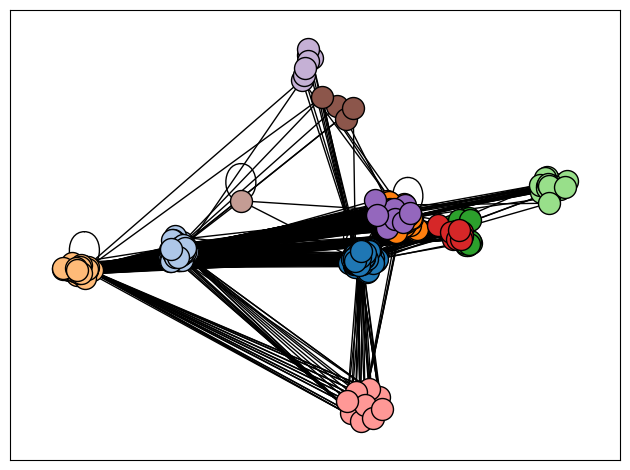

In [41]:
# Use the "supernode" positions as the center of each node cluster
centers = list(superpos.values())
pos = {}
for center, comm in zip(centers, communities):
    pos.update(nx.spring_layout(nx.subgraph(sub_G, comm), center=center, seed=1430))

# Nodes colored by cluster
for nodes, clr in zip(communities, color_list):
    nx.draw_networkx_nodes(sub_G, pos=pos, nodelist=nodes, node_color=clr, node_size=250, linewidths=1, edgecolors='black')
nx.draw_networkx_edges(sub_G, pos=pos)

plt.tight_layout()
plt.show()

***

# 5. Opinion Dynamics 2:
Simulare il modello di opinion dynamics (a classi continue) Algoritmic Bias su un sample (connesso) di 1000 nodi del grafo selezionato (utilizzando NDlib) e studiarne i trend al variare del valore dei parametri epsilon e gamma. Discutere i risultati ottenuti e fornire, ove possibile, la descrizione di un potenziale fenomeno - relativo ai dati selezionati - che possa essere catturato da diverse configurazioni del modello.

Deffuant

In [22]:
# per importare il path dovo ho scaricato la libreria
import sys
sys.path.append("/Users/andreaalessandrelli/Downloads/ndlib/ndlib/models/opinions/")
# Importa il modulo
from AlgorithmicBiasMediaModel import AlgorithmicBiasMediaModel

# librerie standard per Opinion
import ndlib.models.opinions as op
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution

no display found. Using non-interactive Agg backend


# **Algorithmic Bias**

###  $\gamma=0$ e alto $\epsilon$ $\Longrightarrow$ CONVERGENZA

In [220]:
model1 = op.AlgorithmicBiasModel(sub_G)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.4)
config.add_model_parameter("gamma", 0)
model1.set_initial_status(config)

# Simulation execution
iterations = model1.iteration_bunch(200, progress_bar=True)

100%|██████████| 200/200 [00:02<00:00, 70.97it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


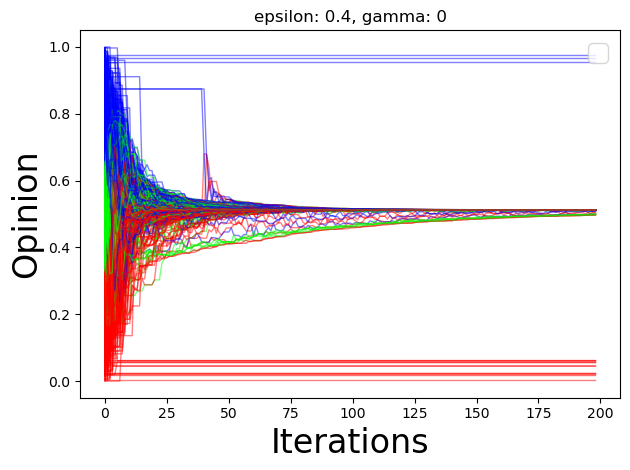

In [221]:
%matplotlib inline
viz = OpinionEvolution(model1, iterations)
viz.plot()

###  $\gamma=0$ e bassissimo $\epsilon$ $\Longrightarrow$ FRAMMENTAZIONE

100%|██████████| 1000/1000 [00:14<00:00, 70.06it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


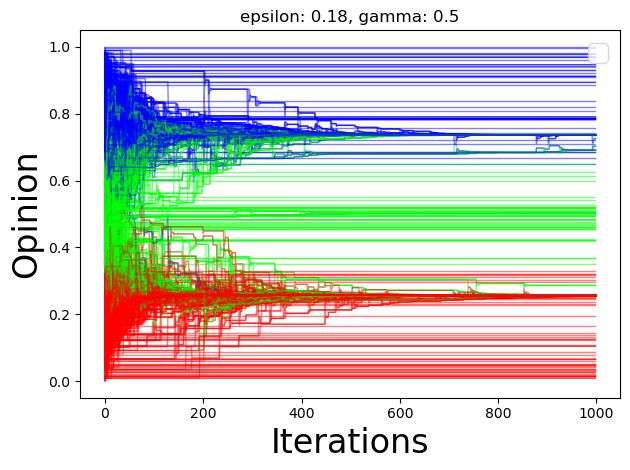

In [109]:
model3 = op.AlgorithmicBiasModel(sub_G)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.18)
config.add_model_parameter("gamma", 0.5)
model3.set_initial_status(config)

# Simulation execution
iterations = model3.iteration_bunch(1000, progress_bar=True)
%matplotlib inline
viz = OpinionEvolution(model3, iterations)
viz.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


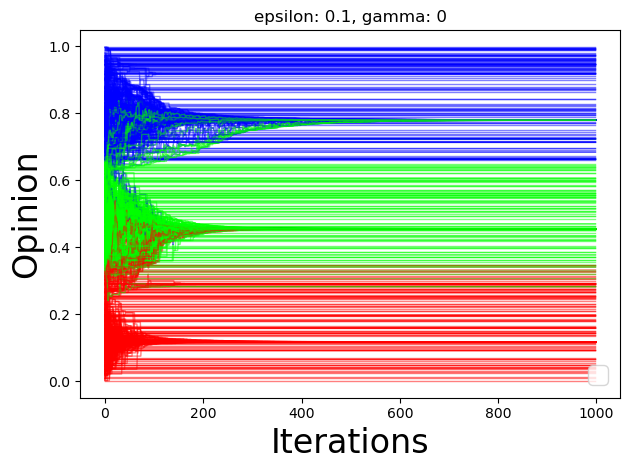

In [101]:
%matplotlib inline
viz = OpinionEvolution(model3, iterations)
viz.plot()

### No $\gamma$ e alto $\epsilon$ $\Longrightarrow$ si inizia a intravedere una POLARIZZAZIONE

In [224]:
model3 = op.AlgorithmicBiasModel(sub_G)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.215)
config.add_model_parameter("gamma", 0)
model3.set_initial_status(config)

# Simulation execution
iterations = model3.iteration_bunch(1000, progress_bar=True)

100%|██████████| 1000/1000 [00:14<00:00, 71.20it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


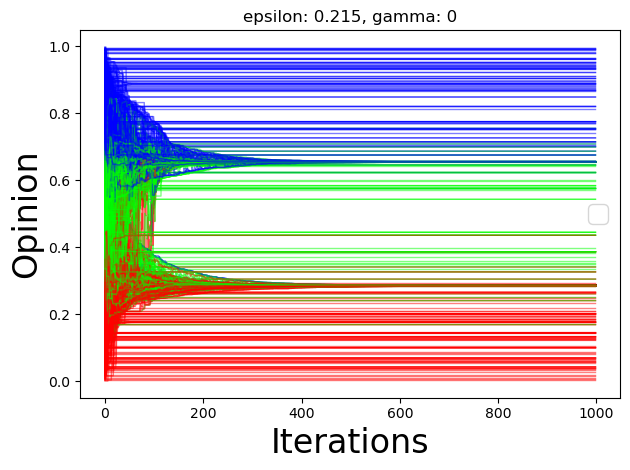

In [158]:
%matplotlib inline
viz = OpinionEvolution(model3, iterations)
viz.plot()

***

## $\gamma = 2$ e basso $\epsilon$

In [225]:
model3 = op.AlgorithmicBiasModel(sub_G)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.215)
config.add_model_parameter("gamma", 1)
model3.set_initial_status(config)

# Simulation execution
iterations = model3.iteration_bunch(1000, progress_bar=True)

100%|██████████| 1000/1000 [00:13<00:00, 71.60it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


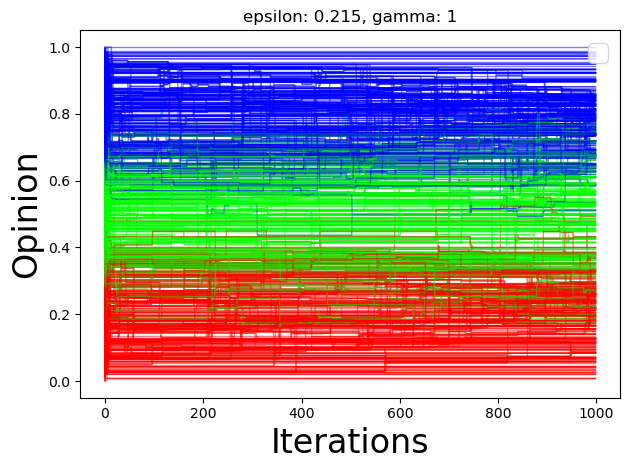

In [226]:
%matplotlib inline
viz = OpinionEvolution(model3, iterations)
viz.plot()

***

## $\gamma = 2$ e alto $\epsilon$

100%|██████████| 1000/1000 [00:13<00:00, 75.04it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


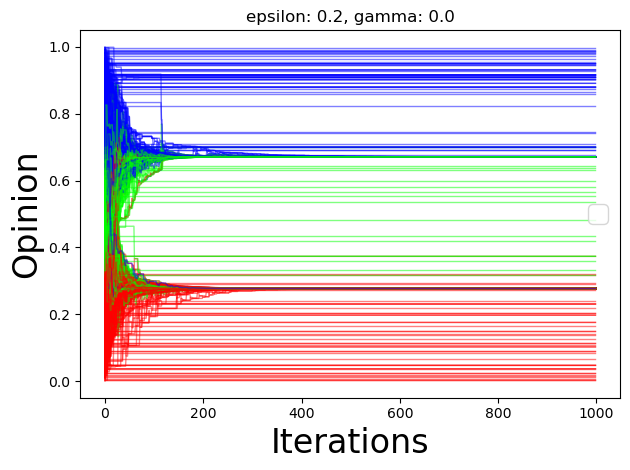

In [99]:
model3 = op.AlgorithmicBiasModel(sub_G)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.2)
config.add_model_parameter("gamma", 0.0)
model3.set_initial_status(config)

# Simulation execution
iterations = model3.iteration_bunch(1000, progress_bar=True)

%matplotlib inline
viz = OpinionEvolution(model3, iterations)
viz.plot()

***
***

## **MEDIA**

in tutte le simulazioni si assumerà che il $\gamma$ dei NODI normali sia uguale al $\gamma$ dei MEDIA in esame

***

### $\gamma =0$

#### k = 2

100%|██████████| 200/200 [00:03<00:00, 52.91it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


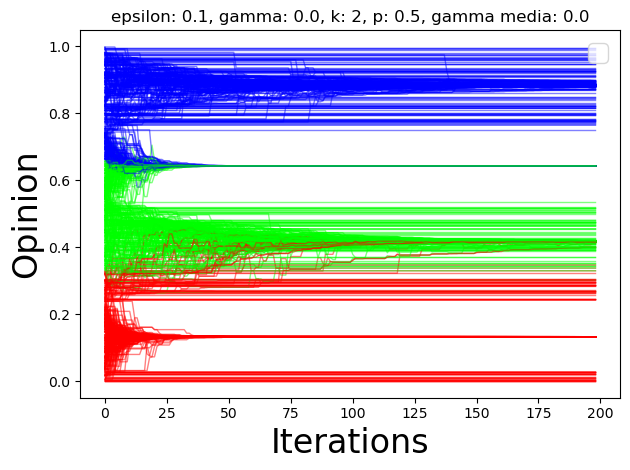

In [23]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 0.0
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.1)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 2)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
#config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

#### $\gamma=0, \epsilon = 0.215$ 

100%|██████████| 200/200 [00:03<00:00, 51.93it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


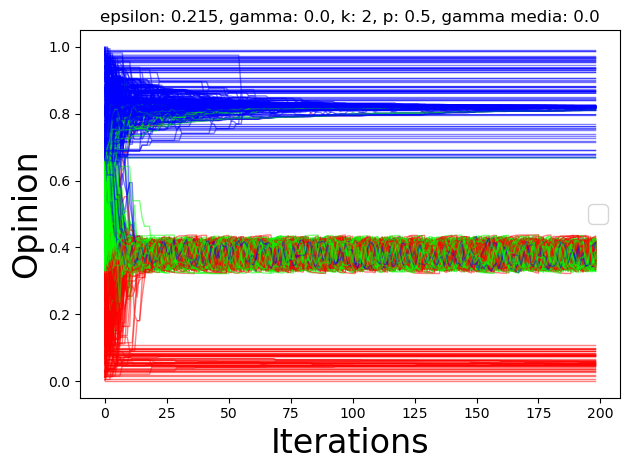

In [24]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 0.0
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.215)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 2)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
#config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

#### $\gamma=0,  \epsilon = 0.4$ 

100%|██████████| 200/200 [00:03<00:00, 52.31it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


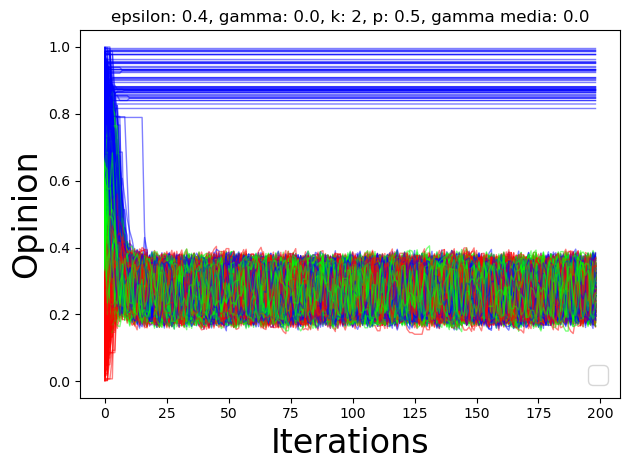

In [25]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 0.0
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.4)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 2)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
#config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

***

#### k = 1

* **MEDIA ESTREMISTA**

100%|██████████| 200/200 [00:03<00:00, 51.61it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


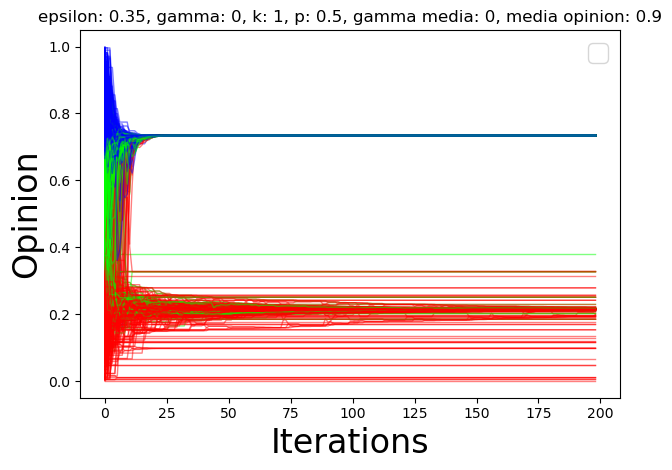

In [26]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 0
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.35)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 1)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.9)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:03<00:00, 51.96it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


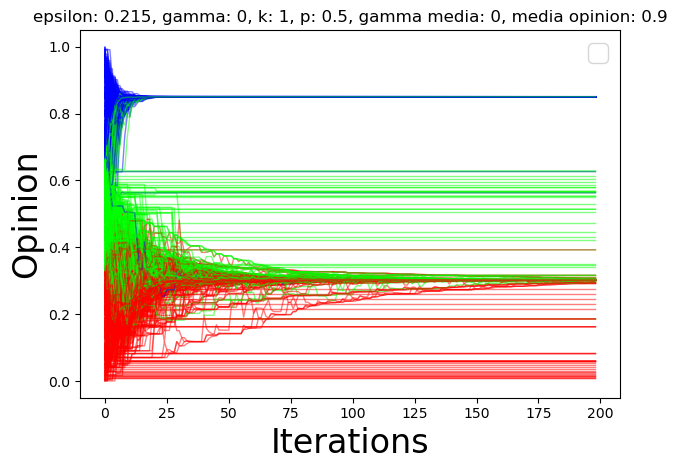

In [27]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 0
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.215)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 1)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.9)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:03<00:00, 52.63it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


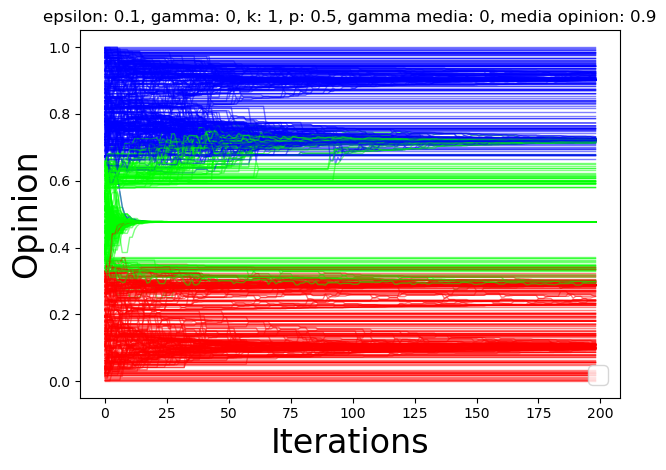

In [28]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 0
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.1)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 1)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.9)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

* **MEDIA MODERATO**

100%|██████████| 200/200 [00:03<00:00, 51.60it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


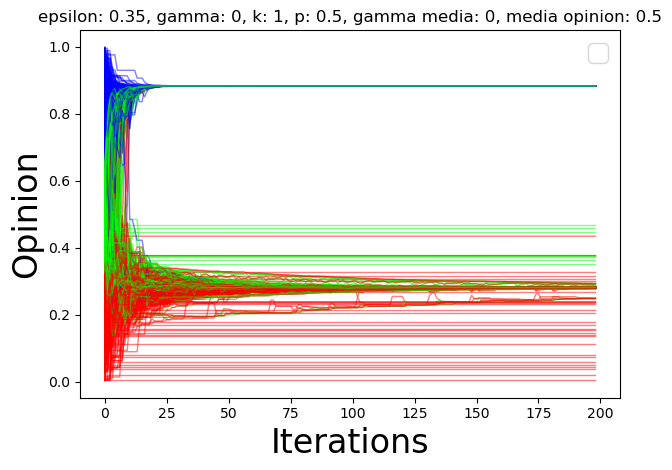

In [29]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 0
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.35)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 1)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:03<00:00, 51.65it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


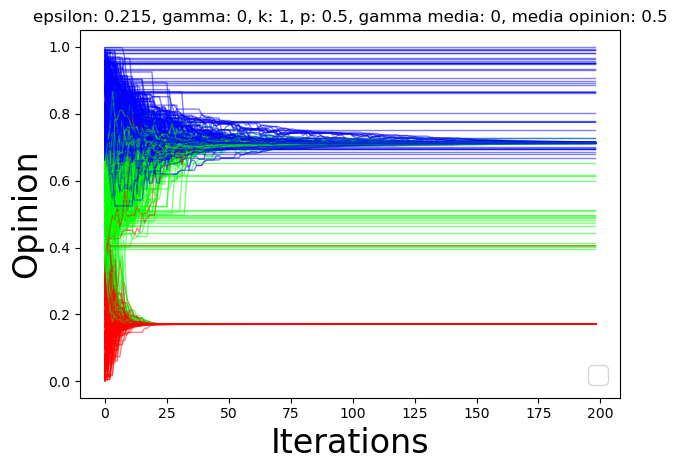

In [257]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 0
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.215)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 1)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:03<00:00, 51.58it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


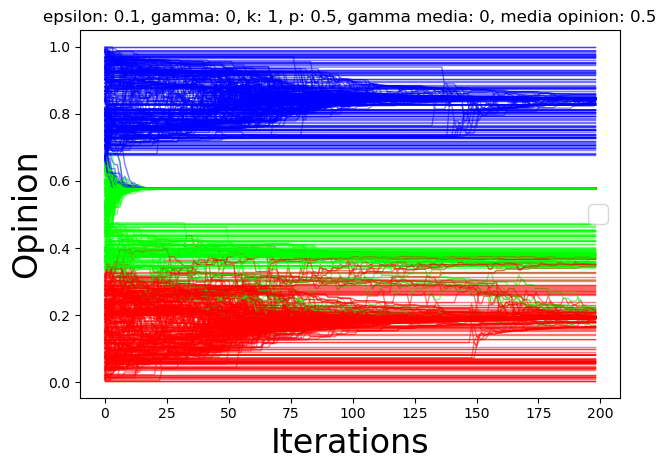

In [258]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 0
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.1)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 1)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

***

#### k = 3

100%|██████████| 200/200 [00:03<00:00, 53.78it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


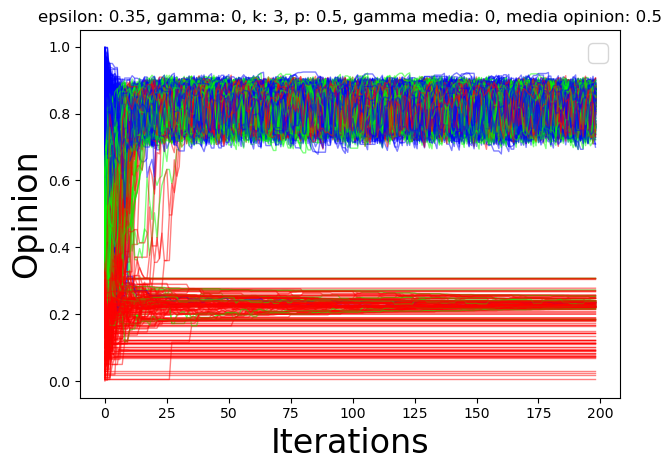

In [30]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 0
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.35)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 3)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:03<00:00, 53.34it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


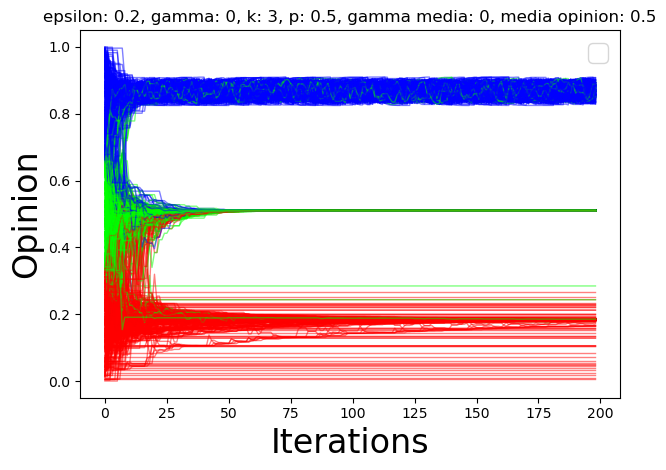

In [31]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 0
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.2)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 3)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:03<00:00, 52.72it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


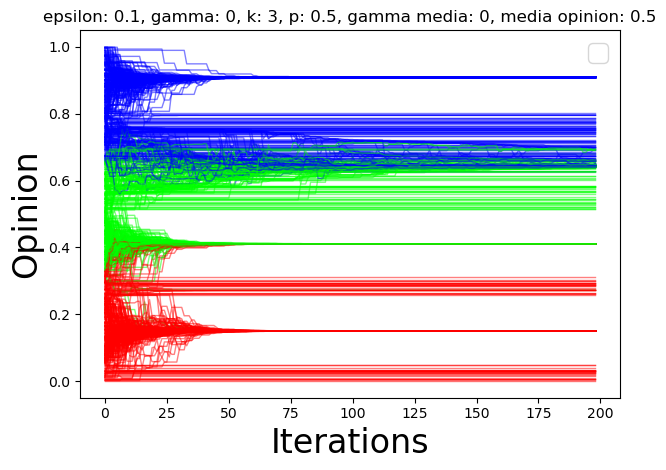

In [33]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 0
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.1)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 3)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

***
***

### $\gamma\neq 0$

#### k =3

100%|██████████| 200/200 [00:04<00:00, 48.47it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


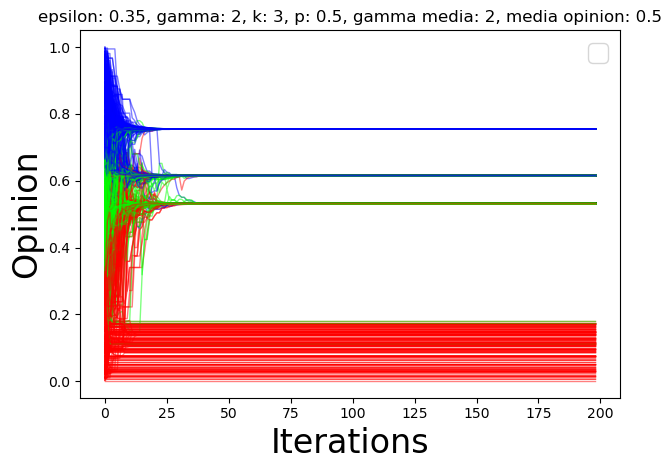

In [34]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 2
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.35)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 3)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:04<00:00, 48.13it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


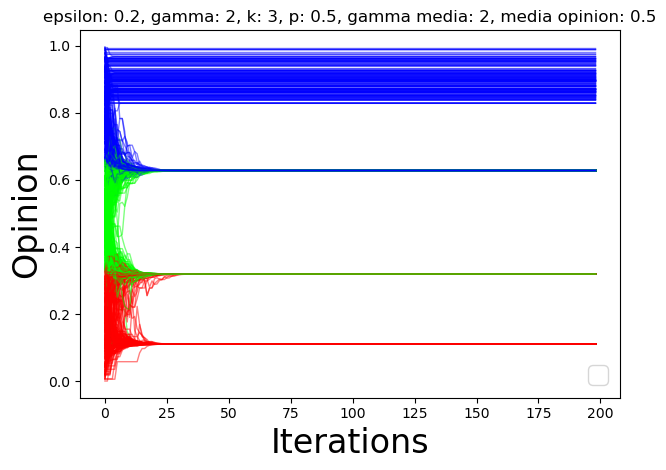

In [35]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 2
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.2)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 3)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:04<00:00, 48.55it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


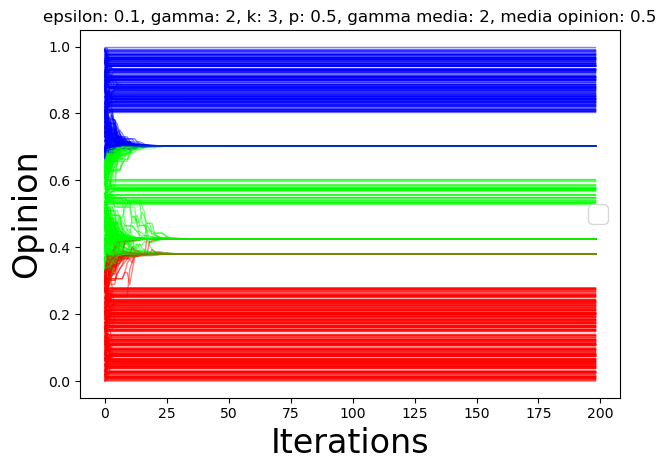

In [36]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 2
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.1)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 3)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

***

#### k = 2

100%|██████████| 200/200 [00:04<00:00, 47.61it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


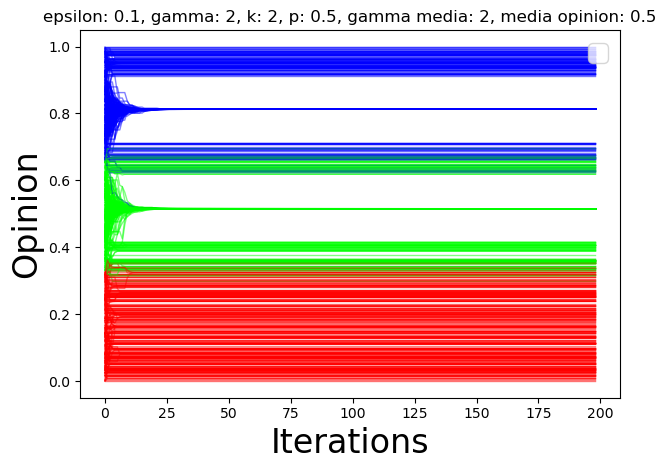

In [37]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 2
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.1)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 2)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:04<00:00, 48.54it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


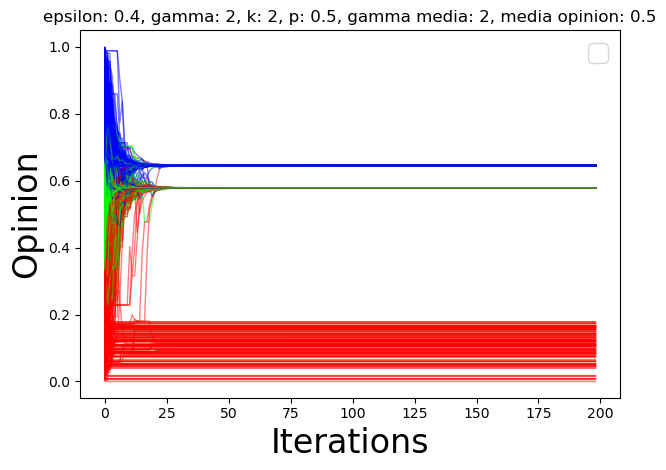

In [43]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 2
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.4)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 2)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:04<00:00, 48.47it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


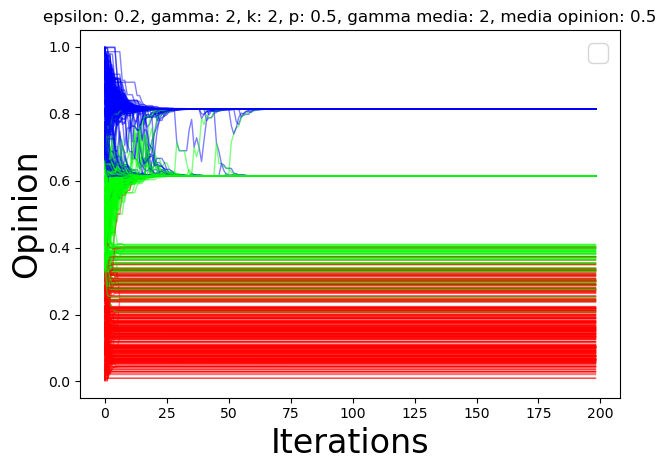

In [40]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 2
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.2)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 2)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:03<00:00, 50.23it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


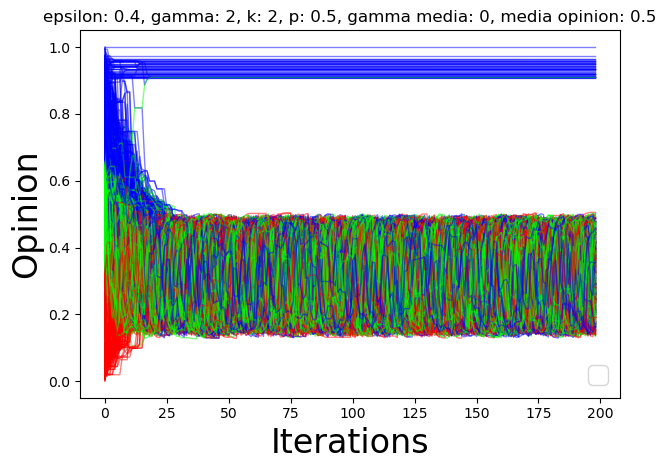

In [41]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 2
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.4)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 2)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", 0)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:04<00:00, 48.57it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


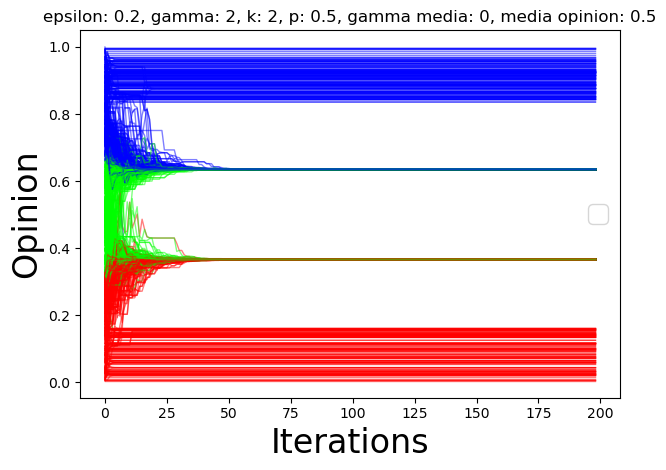

In [44]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 2
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.2)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 2)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", 0)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:04<00:00, 49.45it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


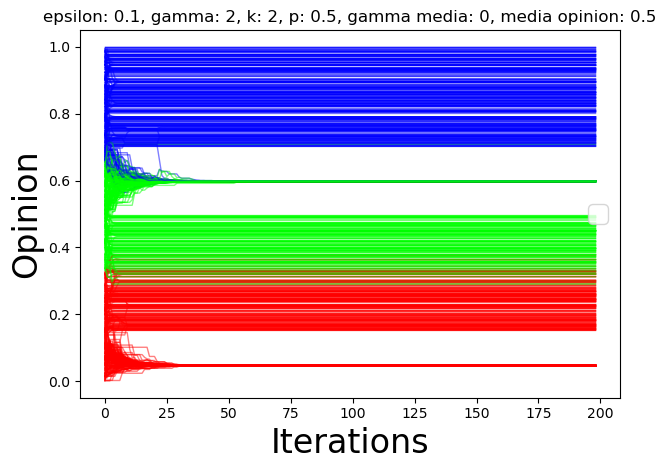

In [45]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 2
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.1)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 2)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", 0)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

***

#### k = 1

estremista

100%|██████████| 500/500 [00:11<00:00, 44.30it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


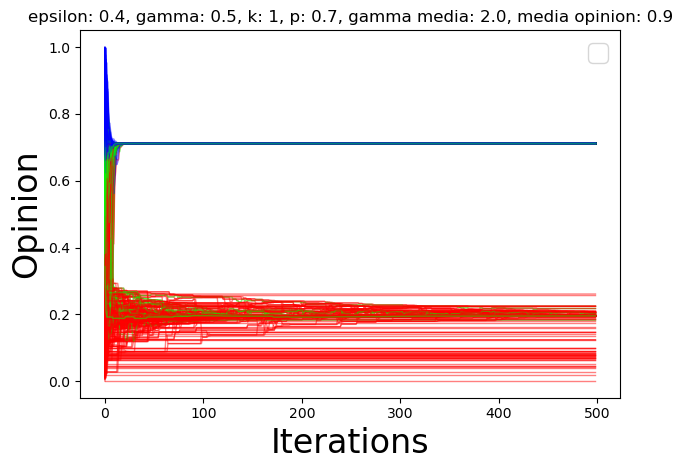

In [186]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 0.5
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.4)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 1)
config.add_model_parameter("p", 0.7)
config.add_model_parameter("gamma_media", 2.0)
config.add_model_parameter("media_opinion", 0.9)
model.set_initial_status(config)

iterations = model.iteration_bunch(500, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:03<00:00, 52.16it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


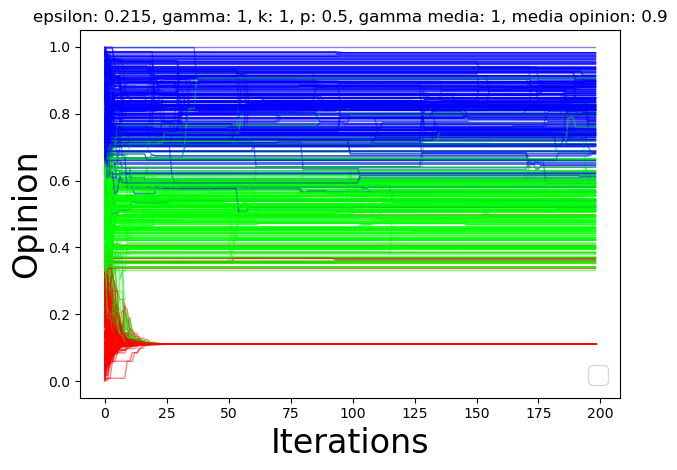

In [47]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 1
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.215)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 1)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("media_opinion", 0.9)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 500/500 [00:10<00:00, 45.79it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


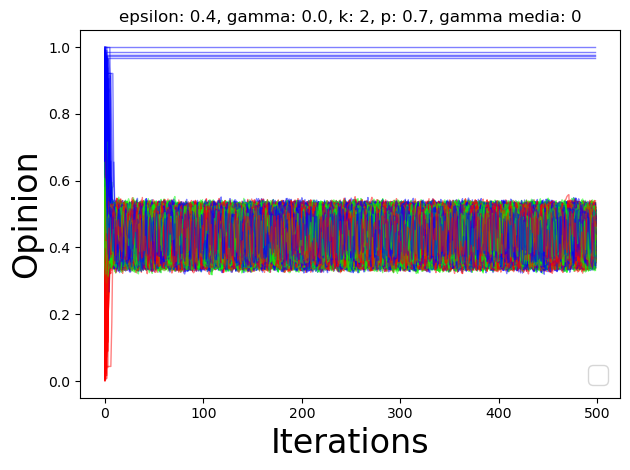

In [141]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 0.0
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.4)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 2)
config.add_model_parameter("p", 0.7)
config.add_model_parameter("gamma_media", 0)
#config.add_model_parameter("media_opinion", 0.1)
model.set_initial_status(config)

iterations = model.iteration_bunch(500, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:04<00:00, 49.51it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


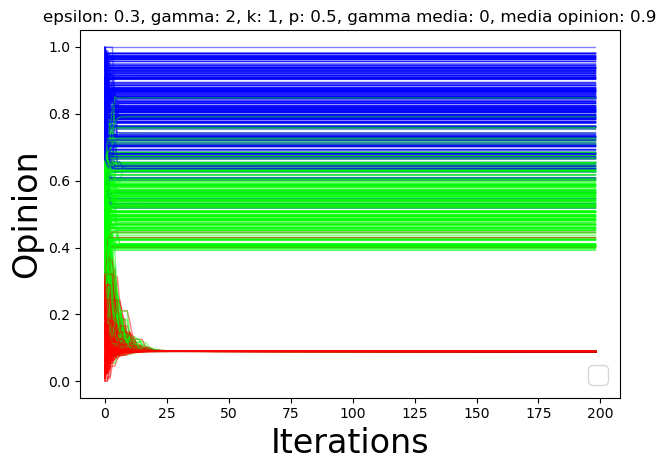

In [50]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 2
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.3)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 1)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", 0)
config.add_model_parameter("media_opinion", 0.9)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:04<00:00, 48.26it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


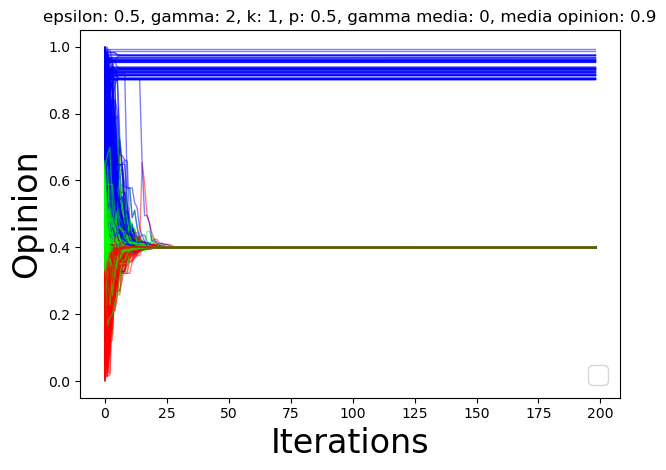

In [318]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 2
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.5)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 1)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", 0)
config.add_model_parameter("media_opinion", 0.9)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

100%|██████████| 200/200 [00:04<00:00, 48.90it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


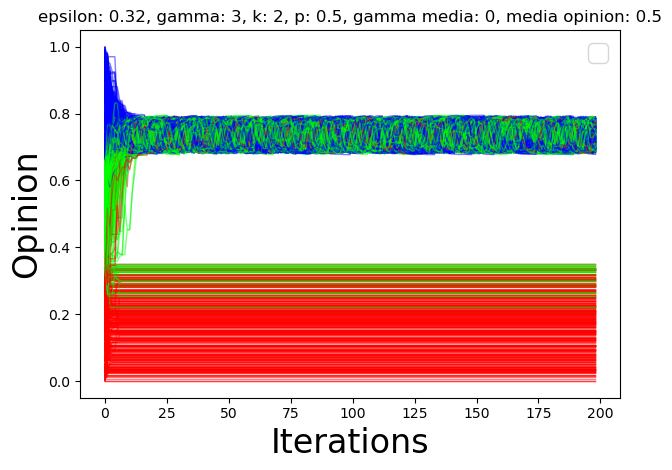

In [74]:
# Model selection
model = AlgorithmicBiasMediaModel(sub_G)
gamma = 3
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.32)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("k", 2)
config.add_model_parameter("p", 0.5)
config.add_model_parameter("gamma_media", 0)
config.add_model_parameter("media_opinion", 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(200, progress_bar=True)
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()